In [8]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# plot Learning curve function provided by sklearn
from Learning_Curve import plot_learning_curve

x_train_original = pd.read_csv("../data/COMP30027_2021_Project2_datasets/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# oversample = RandomOverSampler(sampling_strategy='minority')

train_label = x_train_original.loc[:,'duration_label']
# X_train, X_test, y_train, y_test = train_test_split(x_train_original,train_label, test_size=0.4, stratify=train_label, random_state=42)



# # First random oversampling, bring count of class 3 to be equal to the highest class count.
# X_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)


# # Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
# X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)

# # .value_counts()
# # use recipe name as an example
train_corpus = x_train_original.loc[:,['name','steps','ingredients']]



# Joining columns for train
train_corpus['steps'] = train_corpus['steps'].apply(eval)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(eval)
train_corpus['steps'] = train_corpus['steps'].apply(' '.join)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(' '.join)

train_corpus

,name,steps,ingredients
0,wi gal s chicken rice stove top dish made heal...,"in saucepan , melt margarine and combine with ...",margarine olive oil celery onion garlic clove ...
1,irish pin oats,melt 1 tbs butter in a small saucepan over med...,butter pinhead oats water half-and-half salt
2,cheesy beef n biscuit casserole,"brown ground beef , onion and green pepper dra...",ground beef onion green pepper tomato sauce ch...
3,lemonade chicken oamc,brown chicken in oil combine all ingredients e...,boneless skinless chicken frozen lemonade oil ...
4,graham and peanut butter bon bons,set almond bark aside mix remaining ingredient...,graham cracker crumbs crunchy peanut butter po...
...,...,...,...
39995,sour cream lemon bread abm,"in a measuring cup , combine sour cream and le...",sour cream lemon juice milk butter egg fresh l...
39996,americanized shepherd s pie,preheat oven to 350 degrees add potatoes to po...,potatoes butter milk olive oil onion garlic gr...
39997,new zealand kiwi salsa,"place the kiwifruit , pomegranate seeds , avoc...",kiwi fruits pomegranate seeds avocado green on...
39998,meat and vegetable shepherd s pie,"in a large , deep frying pan , heat oil over m...",oil onions garlic cloves minced beef carrots g...


In [11]:
all_words = []

for i in range (0, len(train_corpus['steps'])):
    s = ''
    s += train_corpus.loc[i,'name'] + train_corpus.loc[i, 'steps'] + train_corpus.loc[i, 'ingredients']
    all_words.append(s)
all_words

['wi gal s chicken rice stove top dish made healthierin saucepan , melt margarine and combine with olive oil add celery & onion and saute until tender add garlic for the last minute add carrots , broth , rice and pepper and bring to a boil reduce heat , cover , and simmer for 35 minutes , or until rice is tender stir in chicken and parsley , cover , and simmer for 5 minutes longer or until heated throughmargarine olive oil celery onion garlic clove carrots low sodium chicken broth brown rice pepper salt substitute boneless skinless chicken breasts fresh parsley',
 'irish pin oatsmelt 1 tbs butter in a small saucepan over med high heat when the butter stops foaming , add the oats and stir well for 1 minute reduce heat to low , and let the oats cook for 1 more minute add the water , stir and place the lid on tightly allow to simmer for 20 minutes , or until the majority of the water is absorbed add the half and half and turn off the heat replace the lid and allow to sit for 5 minutes add

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_word ='english' means deleting some common words like the, a,.... in list 'english'



vectorizer = CountVectorizer(stop_words='english', max_features = 500)
X = vectorizer.fit(all_words)
vocab_dict = vectorizer.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_final = vectorizer.transform(all_words)
X_final.shape

(40000, 500)

### Learning Curve Function

In [13]:
from sklearn import svm

LinearSVC_clf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)
SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)

<module 'matplotlib.pyplot' from 'c:\\users\\user\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

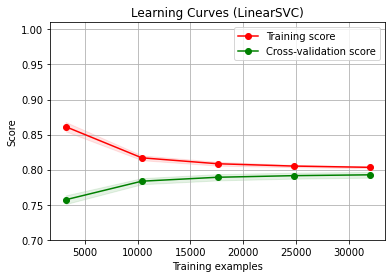

In [16]:
title = "Learning Curves (LinearSVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


plot_learning_curve(SVC_clf, title, X_final, train_label, ylim=(0.7, 1.01), cv=cv, n_jobs=4)